문제: [3.1 FinanceDataReader를 통한 개별종목 수집하기](https://github.com/corazzon/finance-data-analysis/blob/main/3.1%20FinanceDataReader%EB%A5%BC%20%ED%86%B5%ED%95%9C%20%EA%B0%9C%EB%B3%84%EC%A2%85%EB%AA%A9%20%EC%88%98%EC%A7%91%ED%95%98%EA%B8%B0-input.ipynb)

## 기본 세팅

In [1]:
import pandas as pd
import FinanceDataReader as fdr
from matplotlib import pyplot as plt
import seaborn as sns

## 개별 종목의 일별 시세 수집

             Open   High    Low  Close    Volume    Change
Date                                                      
2020-01-02  55500  56000  55000  55200  12993228 -0.010753
2020-01-03  56000  56600  54900  55500  15422255  0.005435
2020-01-06  54900  55600  54600  55500  10278951  0.000000
2020-01-07  55700  56400  55600  55800  10009778  0.005405
2020-01-08  56200  57400  55900  56800  23501171  0.017921
...           ...    ...    ...    ...       ...       ...
2021-01-21  87500  88600  86500  88100  25318011  0.010321
2021-01-22  89000  89700  86800  86800  30861661 -0.014756
2021-01-25  87000  89900  86300  89400  27258534  0.029954
2021-01-26  88800  89200  86500  86700  33178936 -0.030201
2021-01-27  86600  87700  85600  85600  24488962 -0.012687

[266 rows x 6 columns]
             Open   High    Low  Close    Volume    Change
Date                                                      
2020-01-02  55500  56000  55000  55200  12993228 -0.010753
2020-01-03  56000  56600  54900 

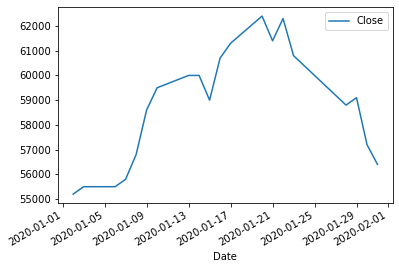

In [2]:
print(fdr.DataReader("005930", start="2020"))
print(fdr.DataReader("005930", start="2020-01-01"))
print(fdr.DataReader("005930", start="2020-01-01", end="2020-01-31"))
fdr.DataReader("005930", start="2020-01-01", end="2020-01-31").plot(y="Close", kind="line")
plt.show()

## 상장종목 목록 가져오기/사용하기

In [3]:
# 상장종목 목록 가져오기
df_krx = pd.read_csv("data/krx_list.csv")
df_krx["ListingDate"] = pd.to_datetime(df_krx["ListingDate"])

# 상장종목 목록 사용하기
print(df_krx.head(10))
print(df_krx.loc[ df_krx["Name"] == "빅히트", "Name" ].values[0])
print(df_krx.loc[ df_krx["Name"] == "히트" ])
print(df_krx.loc[ df_krx["Name"].str.contains("히트") ])

   Symbol  Market                Name           Sector             Industry  \
0  060310  KOSDAQ                  3S    특수 목적용 기계 제조업          반도체 웨이퍼 캐리어   
1  095570   KOSPI              AJ네트웍스  산업용 기계 및 장비 임대업  렌탈(파렛트, OA장비, 건설장비)   
2  006840   KOSPI               AK홀딩스           기타 금융업                 지주사업   
3  054620  KOSDAQ              APS홀딩스           기타 금융업          인터넷 트래픽 솔루션   
4  265520  KOSDAQ               AP시스템    특수 목적용 기계 제조업          디스플레이 제조 장비   
5  211270  KOSDAQ                AP위성   통신 및 방송 장비 제조업             위성통신 단말기   
6  152100   KOSPI         ARIRANG 200              NaN                  NaN   
7  295820   KOSPI     ARIRANG 200동일가중              NaN                  NaN   
8  253150   KOSPI   ARIRANG 200선물레버리지              NaN                  NaN   
9  253160   KOSPI  ARIRANG 200선물인버스2X              NaN                  NaN   

  ListingDate SettleMonth      Representative                       HomePage  \
0  2002-04-23         03월  박종익, 김세완 (각자 대표이사)     

## 데이터 받아오기 함수 작성

In [4]:
# 종목명으로 종목 코드를 받아오는 함수 만들기
def item_code_by_item_name(item_name=None):
    item_code = None
    if(item_name is not None):
        item_list = df_krx.loc[ df_krx["Name"] == item_name, "Symbol" ].values
        if(len(item_list) > 0):
            item_code = item_list[0]
    return item_code

print(item_code_by_item_name("NAVER"))
print(item_code_by_item_name("네이버"))
print(item_code_by_item_name("삼성전자"))
print(item_code_by_item_name("셀트리온"))
print(item_code_by_item_name("카카오게임즈"))

# 종목명으로 일별시세를 받아오는 함수 만들기
def find_item_list(item_name=None, year=2020):
    item_list = None
    item_code = item_code_by_item_name(item_name)
    if(item_code is not None):
        start_date = str(year)+"-01-01"
        end_date = str(year)+"-12-31"
        item_list = fdr.DataReader(item_code, start=start_date, end=end_date)
    return item_list

print(find_item_list("LG화학"))
print(find_item_list("빅히트", 2021))
stock_daily = find_item_list("빅히트")

035420
None
005930
068270
293490
              Open    High     Low   Close  Volume    Change
Date                                                        
2020-01-02  321000  321000  313500  314000  139496 -0.011024
2020-01-03  317000  318500  310500  311000  165030 -0.009554
2020-01-06  308000  311000  306500  307000  138154 -0.012862
2020-01-07  306000  313500  305000  311000  133788  0.013029
2020-01-08  306000  307000  301500  302000  225471 -0.028939
...            ...     ...     ...     ...     ...       ...
2020-12-23  802000  830000  777000  806000  594211  0.011292
2020-12-24  810000  822000  802000  818000  335065  0.014888
2020-12-28  818000  824000  807000  814000  264888 -0.004890
2020-12-29  817000  827000  805000  813000  392849 -0.001229
2020-12-30  813000  824000  805000  824000  339889  0.013530

[248 rows x 6 columns]
              Open    High     Low   Close   Volume    Change
Date                                                         
2021-01-04  160000  160500

## 시각화

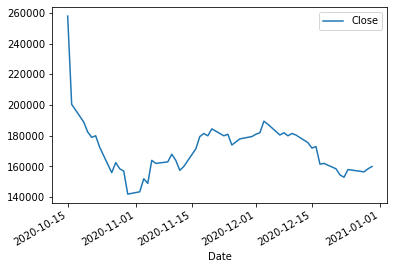

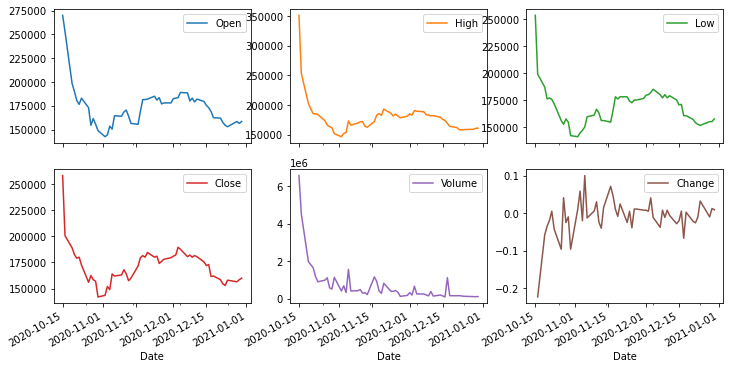

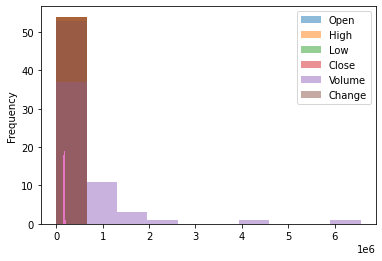

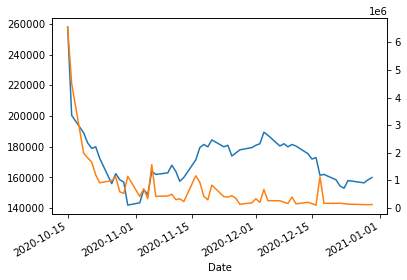

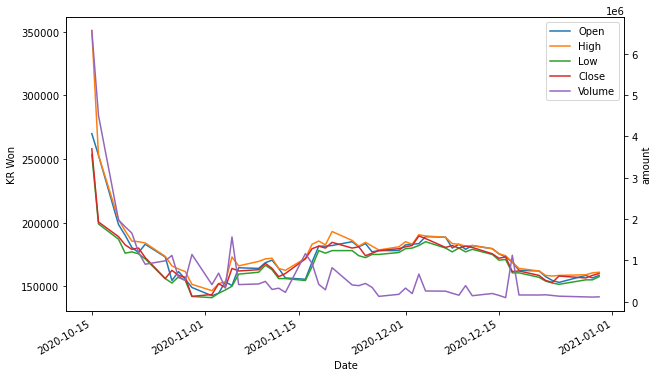

In [20]:
# 개별종목 시세 시각화
## pandas 의 plot으로 시각화 하기
stock_daily.plot(y="Close")
plt.show()

## 서브플롯 그리기
stock_daily.plot(subplots=True, layout=(2,3), figsize=(12,6)) # sharex=False 추가하면 x축 라벨 공유 안 함
plt.show()
stock_daily.plot.hist(bins=10, alpha=0.5)
plt.show()
plt.hist(stock_daily["Close"], bins=10)
plt.show()

# 2축 그래프 그리기
stock_daily["Close"].plot()
stock_daily["Volume"].plot(secondary_y=True)  
plt.show()

plot_stock_daily = stock_daily.loc[:, stock_daily.columns != "Change"].plot(secondary_y=["Volume"], mark_right=False, figsize=(10,6))
plot_stock_daily.set_ylabel("KR Won")
plot_stock_daily.right_ax.set_ylabel("amount")
plt.show()